In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

In [ ]:
NFData = pd.read_csv("/content/NetflixCustomerData.csv")

In [ ]:
NFData.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,...,25,Comedy,3.489465,7,Female,15,No,No,LOHRYYC9E8,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,...,21,Comedy,2.251860,3,Male,8,No,NaN,RIH7RFEZCS,0
2,6,NaN,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,...,29,Fantasy,NaN,4,Male,14,No,Yes,JB5J8X2UY1,1
3,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,2.495373,...,45,Drama,1.275004,3,Male,12,No,NaN,Z4GZJIB90P,0
4,27,NaN,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,...,44,Comedy,3.236230,4,Female,18,No,NaN,B3BDJTW0L9,0


In [ ]:
NFData['MonthlyCharges'] = NFData.apply(lambda x: x['TotalCharges']/x['AccountAge'] if pd.isna(x['MonthlyCharges']) else x['MonthlyCharges'], axis=1)
NFData['TotalCharges'] = NFData.apply(lambda x: x['MonthlyCharges']*x['AccountAge'] if pd.isna(x['TotalCharges']) else x['TotalCharges'], axis=1)

In [ ]:
NFData.head(10)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,...,25,Comedy,3.489465,7,Female,15,No,No,LOHRYYC9E8,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,...,21,Comedy,2.251860,3,Male,8,No,NaN,RIH7RFEZCS,0
2,6,15.263884,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,...,29,Fantasy,NaN,4,Male,14,No,Yes,JB5J8X2UY1,1
3,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,2.495373,...,45,Drama,1.275004,3,Male,12,No,NaN,Z4GZJIB90P,0
4,27,12.557676,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,...,44,Comedy,3.236230,4,Female,18,No,NaN,B3BDJTW0L9,0
5,71,11.525170,818.287054,Premium,Credit card,No,Movies,Yes,Computer,7.310172,...,30,Comedy,2.779614,6,Female,16,Yes,NaN,5E4TQK5OVX,0
6,69,17.145910,1183.067820,Basic,NaN,No,Movies,Yes,Mobile,19.008900,...,35,Sci-Fi,4.933494,6,Female,5,No,Yes,8VFNZ1M1I9,1
7,76,17.461875,1327.102526,Premium,Electronic check,No,Movies,Yes,Mobile,24.429413,...,32,Fantasy,2.154737,9,Female,11,Yes,Yes,THKWUHOGUL,0
8,8,NaN,NaN,Premium,Electronic check,No,Both,Yes,Computer,15.488913,...,16,Fantasy,NaN,3,Female,2,No,Yes,IGZ39O1ROC,0
9,26,19.699262,512.180802,Premium,Credit card,Yes,Both,Yes,NaN,2.121762,...,44,Drama,1.725700,4,Male,16,Yes,NaN,JHTQYVGRR4,1


In [ ]:
NFData.dropna(subset=['MonthlyCharges','TotalCharges'],inplace=True)

In [ ]:
NFData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 0 to 962
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                927 non-null    int64  
 1   MonthlyCharges            927 non-null    float64
 2   TotalCharges              927 non-null    float64
 3   SubscriptionType          878 non-null    object 
 4   PaymentMethod             715 non-null    object 
 5   PaperlessBilling          927 non-null    object 
 6   ContentType               927 non-null    object 
 7   MultiDeviceAccess         927 non-null    object 
 8   DeviceRegistered          853 non-null    object 
 9   ViewingHoursPerWeek       927 non-null    float64
 10  AverageViewingDuration    927 non-null    float64
 11  ContentDownloadsPerMonth  927 non-null    int64  
 12  GenrePreference           821 non-null    object 
 13  UserRating                680 non-null    float64
 14  SupportTicketsP

In [ ]:
NFData_model = NFData.drop(columns=['CustomerID'])

num_cols = NFData_model.select_dtypes(include=['float64', 'int64']).columns
cat_cols = NFData_model.select_dtypes(include=['object']).columns

# Handles missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
NFData_model[num_cols] = num_imputer.fit_transform(NFData_model[num_cols])
NFData_model[cat_cols] = cat_imputer.fit_transform(NFData_model[cat_cols])

In [ ]:
#Label encoding for category columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    NFData_model[col] = le.fit_transform(NFData_model[col])
    label_encoders[col] = le

In [ ]:
NFData_model['Churn'].value_counts()

,count
Churn,
0.0,765
1.0,162


In [ ]:
X = NFData_model.drop(columns=['Churn'])
y = NFData_model['Churn']
#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
RFCmodel = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)
RFCmodel.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = RFCmodel.predict(X_test)
print("Classification Report: (Random Forest Classifier)\n", classification_report(y_test, y_pred))
print("Confusion Matrix:  (Random Forest Classifier)\n", confusion_matrix(y_test, y_pred))

Classification Report: (Random Forest Classifier)
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       152
         1.0       1.00      0.15      0.26        34

    accuracy                           0.84       186
   macro avg       0.92      0.57      0.58       186
weighted avg       0.87      0.84      0.79       186

Confusion Matrix:  (Random Forest Classifier)
 [[152   0]
 [ 29   5]]


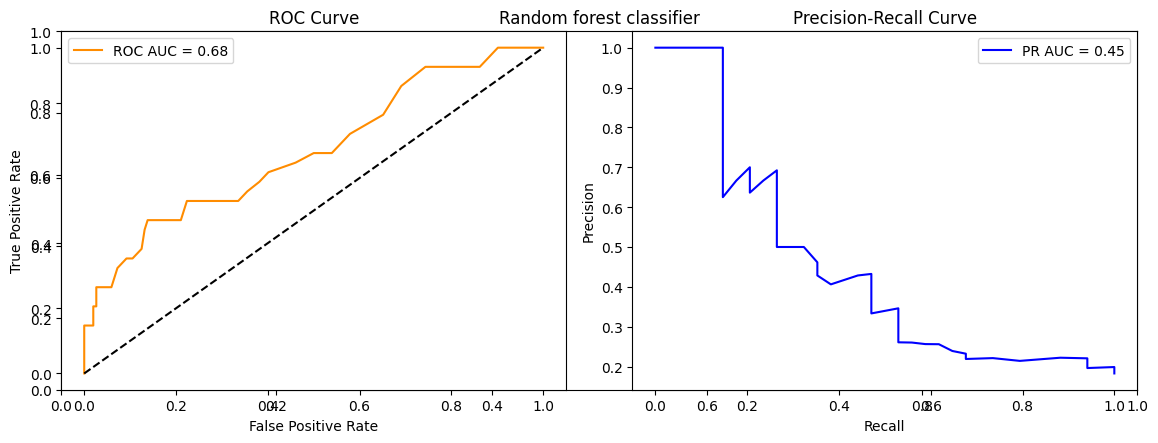

In [ ]:
y_probs = RFCmodel.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(12, 5))
plt.title('Random forest classifier')

# --- ROC Curve ---
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}", color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Using SMOTE on RFC with Class weight as balanced
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
RFCSmotemodel = RandomForestClassifier(random_state=42,class_weight='balanced')
RFCSmotemodel.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = RFCSmotemodel.predict(X_test)
print("Classification Report: (Random Forest Classifier with SMOTE)\n",classification_report(y_test, y_pred))
print("Confusion Matrix: (Random Forest Classifier with SMOTE)\n",confusion_matrix(y_test, y_pred))

Classification Report: (Random Forest Classifier with SMOTE)
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       152
         1.0       0.64      0.26      0.38        34

    accuracy                           0.84       186
   macro avg       0.75      0.62      0.64       186
weighted avg       0.82      0.84      0.81       186

Confusion Matrix: (Random Forest Classifier with SMOTE)
 [[147   5]
 [ 25   9]]


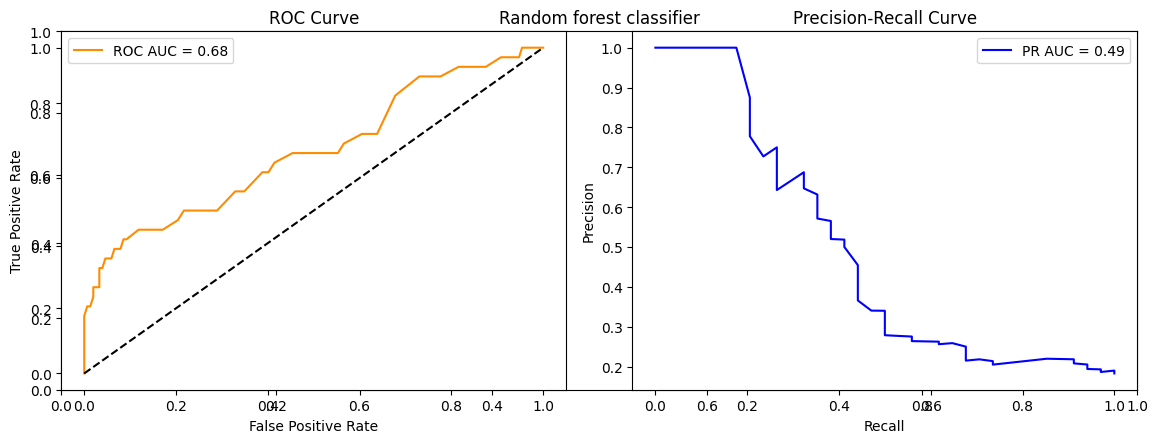

In [ ]:
# Predict probabilities
y_probs = RFCSmotemodel.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(12, 5))
plt.title('Random forest classifier')

# --- ROC Curve ---
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}", color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
#scale_pos_weight
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale = neg / pos

In [ ]:
XGBmodel = xgb.XGBClassifier(scale_pos_weight=scale,use_label_encoder=False,eval_metric='logloss',random_state=42
)

In [ ]:
XGBmodel.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:09:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_probs = XGBmodel.predict_proba(X_test)[:, 1]

threshold = 0.1
y_pred = (y_probs >= threshold).astype(int)

print(f"\nConfusion Matrix (Threshold: {threshold}):")
print("Confusion Matrix: (XGB)\n",confusion_matrix(y_test, y_pred))
print("Classification Report: (XGB)\n",classification_report(y_test, y_pred))


Confusion Matrix (Threshold: 0.1):
Confusion Matrix: (XGB)
 [[121  31]
 [ 20  14]]
Classification Report: (XGB)
               precision    recall  f1-score   support

         0.0       0.86      0.80      0.83       152
         1.0       0.31      0.41      0.35        34

    accuracy                           0.73       186
   macro avg       0.58      0.60      0.59       186
weighted avg       0.76      0.73      0.74       186



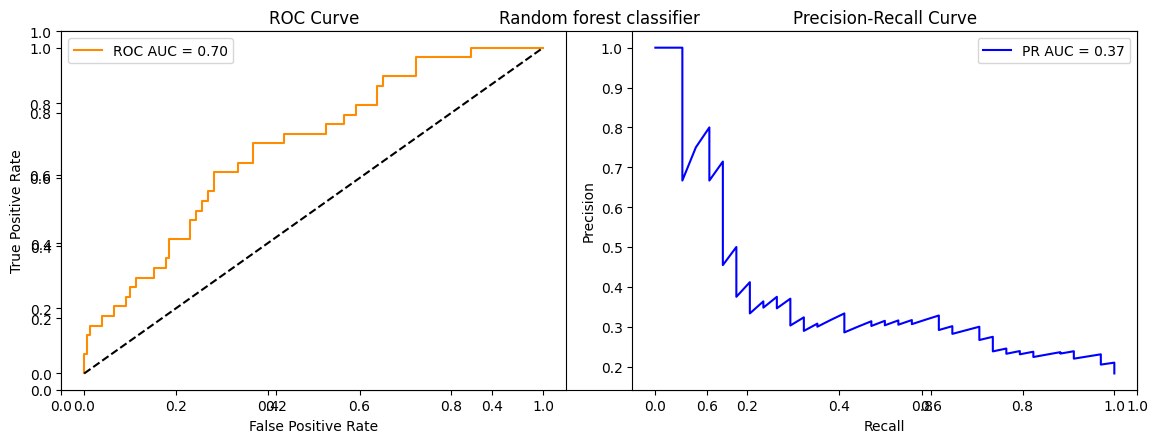

In [ ]:
y_probs = XGBmodel.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(12, 5))
plt.title('Random forest classifier')

# --- ROC Curve ---
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}", color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#XGB with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
XGBSmotemodel = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
XGBSmotemodel.fit(X_res, y_res)
y_probs = XGBSmotemodel.predict_proba(X_test)[:, 1]

threshold = 0.1
y_pred = (y_probs >= threshold).astype(int)

print(f"\nConfusion Matrix (Threshold: {threshold}):")
print("Confusion Matrix: (XGB with SMOTE)\n",confusion_matrix(y_test, y_pred))
print("Classification Report: (XGB with SMOTE)\n",classification_report(y_test, y_pred))




Confusion Matrix (Threshold: 0.1):
Confusion Matrix: (XGB with SMOTE)
 [[117  35]
 [ 16  18]]
Classification Report: (XGB with SMOTE)
               precision    recall  f1-score   support

         0.0       0.88      0.77      0.82       152
         1.0       0.34      0.53      0.41        34

    accuracy                           0.73       186
   macro avg       0.61      0.65      0.62       186
weighted avg       0.78      0.73      0.75       186



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:09:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


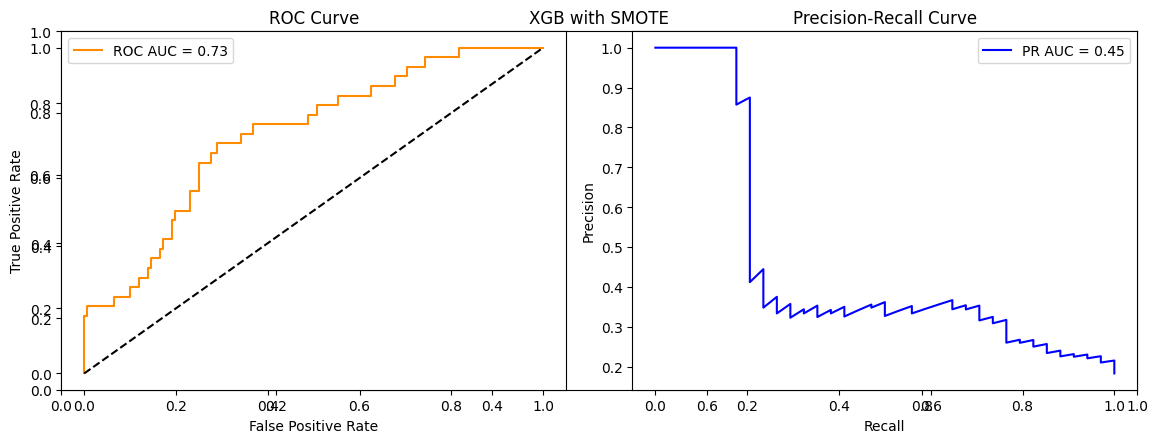

In [ ]:
y_probs = XGBSmotemodel.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(12, 5))
plt.title('XGB with SMOTE')

# --- ROC Curve ---
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}", color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#XGB with SMOTE and GridSearch
params = {
    'max_depth': [1, 5, 8],
    'learning_rate': [0.2, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.9, 1.0],
    'scale_pos_weight': [1, 2, 4]
}
XGBSGridmodel = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid = GridSearchCV(XGBSGridmodel, param_grid=params, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_res, y_res)

print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:18:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 4, 'subsample': 0.9}


In [ ]:
y_probs = best_model.predict_proba(X_test)[:, 1]

threshold = 0.164
y_pred = (y_probs >= threshold).astype(int)

print(f"\nConfusion Matrix (Threshold: {threshold}):")
print("Confusion Matrix: (XGB with SMOTE and Grid Search)\n",confusion_matrix(y_test, y_pred))
print("Classification Report: (XGB with SMOTE and Grid Search)\n",classification_report(y_test, y_pred))



Confusion Matrix (Threshold: 0.164):
Confusion Matrix: (XGB with SMOTE and Grid Search)
 [[119  33]
 [ 12  22]]
Classification Report: (XGB with SMOTE and Grid Search)
               precision    recall  f1-score   support

         0.0       0.91      0.78      0.84       152
         1.0       0.40      0.65      0.49        34

    accuracy                           0.76       186
   macro avg       0.65      0.71      0.67       186
weighted avg       0.82      0.76      0.78       186



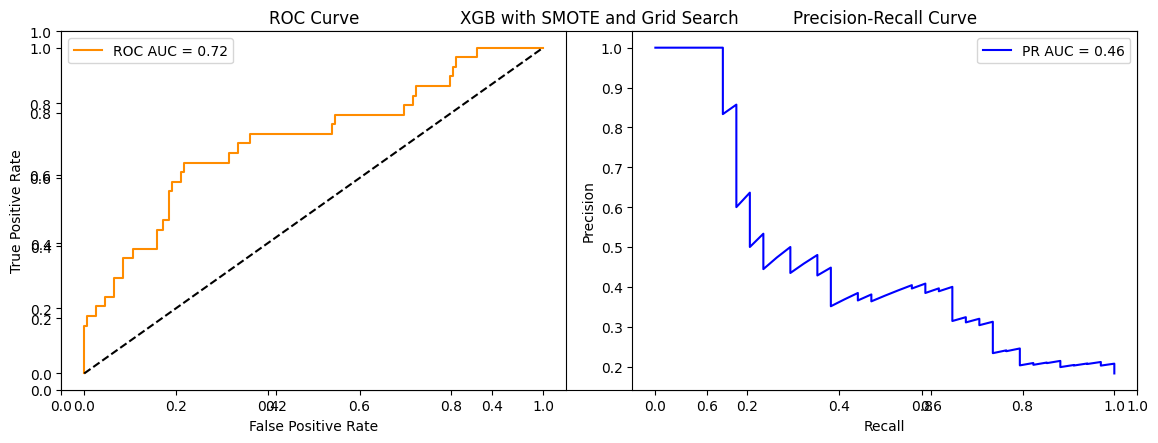

In [ ]:
y_probs = best_model.predict_proba(X_test)[:, 1]

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(12, 5))
plt.title('XGB with SMOTE and Grid Search')
#--- ROC Curve ---
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

#--- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}", color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()


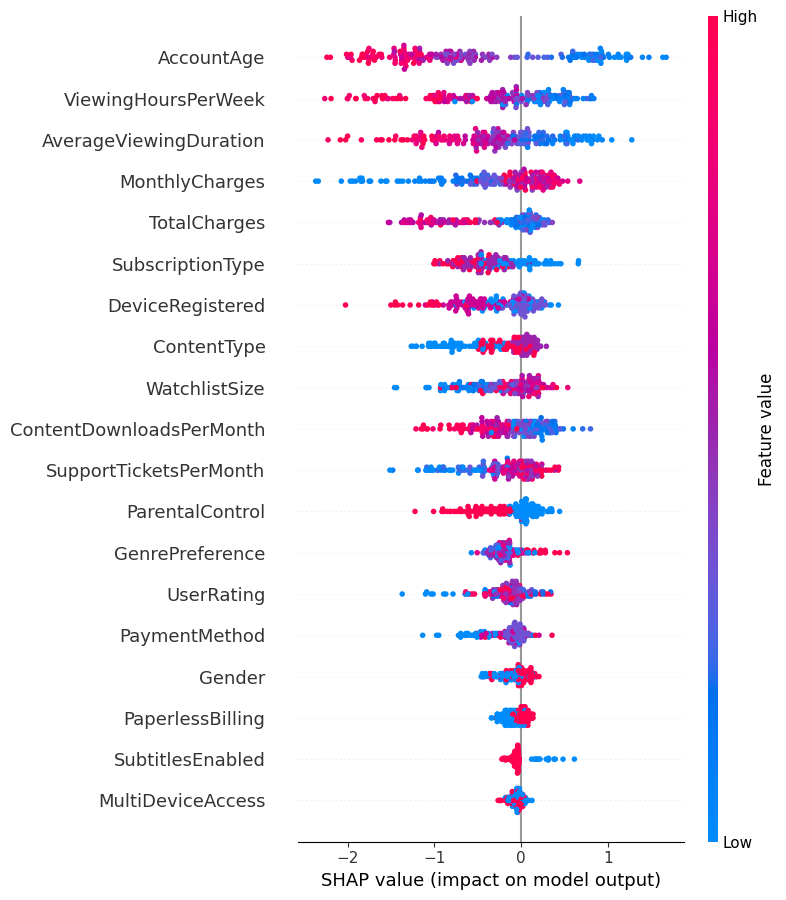

In [ ]:
#SHAP Summary
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

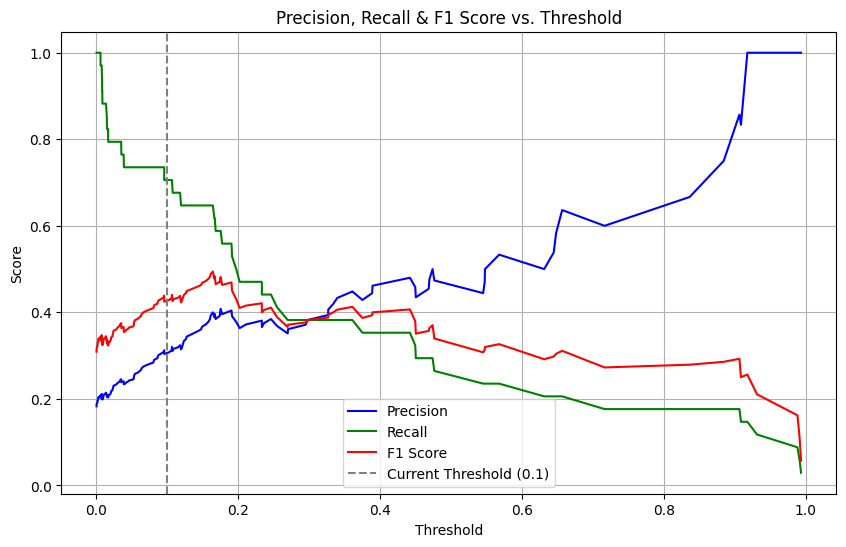

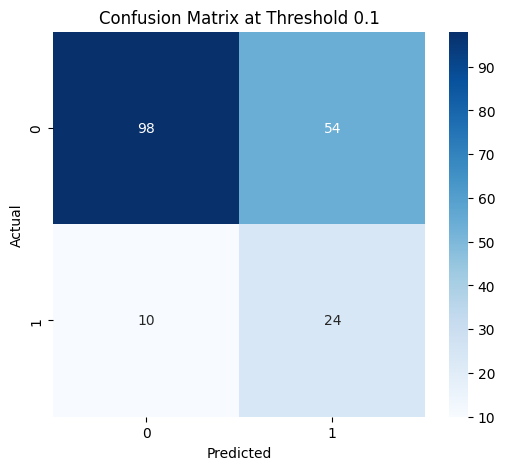

Best threshold for F1: 0.164


In [ ]:
#analysing Threshold

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

y_probs = best_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')
plt.plot(thresholds, f1s[:-1], label='F1 Score', color='red')
plt.axvline(0.1, color='gray', linestyle='--', label='Current Threshold (0.1)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall & F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns
from sklearn.metrics import confusion_matrix

threshold = 0.1
y_pred = (y_probs >= threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix at Threshold {threshold}')
plt.show()
best_threshold = thresholds[np.argmax(f1s)]
print(f'Best threshold for F1: {best_threshold:.3f}')